In [1]:
import torch
import torch.utils.data as data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
default_data_path = 'data'

trainingset_df = pd.read_csv(default_data_path + '/training_set.csv')
trainingset_df.head()

testset_df = pd.read_csv(default_data_path + '/test_set.csv')
testset_df.tail()

,pid,filename,label
20,21,Pentagon (5).csv,Pentagon
21,22,Rectangle (4).csv,Rectangle
22,23,Rectangle (5).csv,Rectangle
23,24,Triangle (4).csv,Triangle
24,25,Triangle (5).csv,Triangle


In [3]:
# TODO: switch to numerical representation of label
from sklearn import preprocessing
label = ['Circle',
         'Heart',
         'Pentagon',
         'Rectangle',
         'Triangle',
         ]
label_encoder = preprocessing.LabelEncoder()
trainingset_df['label'] = label_encoder.fit_transform(trainingset_df['label'].values.ravel())
trainingset_df.tail()


,pid,filename,label
360,361,Pentagon (81).csv,2
361,362,Pentagon (82).csv,2
362,363,Pentagon (83).csv,2
363,364,Pentagon (84).csv,2
364,365,Pentagon (85).csv,2


In [4]:
testset_df['label'] = label_encoder.fit_transform(testset_df['label'].values.ravel())
testset_df.tail()

,pid,filename,label
20,21,Pentagon (5).csv,2
21,22,Rectangle (4).csv,3
22,23,Rectangle (5).csv,3
23,24,Triangle (4).csv,4
24,25,Triangle (5).csv,4


In [5]:
# check training data
for row in range(0, len(trainingset_df)):
    if(row%40 == 0):
        print(default_data_path + '/training_data/' + trainingset_df['filename'].iloc[row], trainingset_df['label']. iloc[row])

data/training_data/Circle (1).csv 0
data/training_data/Heart (16).csv 1
data/training_data/Rectangle (6).csv 3
data/training_data/Triangle (21).csv 4
data/training_data/Pentagon (26).csv 2
data/training_data/Circle (61).csv 0
data/training_data/Heart (66).csv 1
data/training_data/Rectangle (36).csv 3
data/training_data/Triangle (41).csv 4
data/training_data/Pentagon (81).csv 2


In [6]:
sample_train_data = pd.read_csv(default_data_path + '/training_data/' + trainingset_df['filename'].iloc[1])
sample_train_data.head()

,Time,92W,92X,92Y,92Z
0,0.025,2099,2149,1779,13
1,0.097,2103,2147,1804,13
2,0.133,2118,2139,1797,13
3,0.134,2129,2156,1760,13
4,0.211,2114,2150,1741,13


In [7]:
sample_train_data

,Time,92W,92X,92Y,92Z
0,0.025,2099,2149,1779,13
1,0.097,2103,2147,1804,13
2,0.133,2118,2139,1797,13
3,0.134,2129,2156,1760,13
4,0.211,2114,2150,1741,13
...,...,...,...,...,...
179,9.108,2097,2105,1834,13
180,9.176,2087,2111,1725,13
181,9.225,2051,2121,1725,13
182,9.229,2048,2123,1817,13


In [8]:
sample_train_data['92W'].head()

0    2099
1    2103
2    2118
3    2129
4    2114
Name: 92W, dtype: int64

In [9]:
# pandas training X values to numpy
pd.read_csv(default_data_path + '/test_data/' + trainingset_df['filename'].iloc[1])['92W'][0:150].to_numpy()

array([2129, 2127, 2119, 2123, 2105, 2129, 2149, 2159, 2184, 2165, 2147,
       2175, 2202, 2205, 2231, 2231, 2216, 2205, 2200, 2188, 2173, 2148,
       2085, 2113, 2114, 2063, 2072, 2063, 2038, 2020, 2035, 2056, 2063,
       2038, 2056, 2050, 2003, 1991, 2038, 1980, 1933, 2022, 2108, 1961,
       1945, 2016, 1980, 1952, 1960, 1984, 1982, 2011, 1903, 1844, 1876,
       1918, 1983, 1978, 1920, 1790, 1946, 2074, 2061, 1995, 1966, 1987,
       1996, 2123, 2085, 2021, 2000, 2059, 2073, 2057, 2040, 2049, 2136,
       2067, 2042, 2106, 2128, 2034, 2053, 1983, 1991, 2058, 2073, 2074,
       2009, 2024, 2077, 2076, 2064, 2077, 2111, 2123, 2079, 2122, 2142,
       2138, 2152, 2152, 2182, 2168, 2164, 2167, 2181, 2187, 2191, 2176,
       2162, 2157, 2099, 2130, 2177, 2176, 2207, 2187, 2151, 2180, 2196,
       2203, 2187, 2155, 2138, 2148, 2173, 2190, 2176, 2174, 2146, 2168,
       2175, 2164, 2144, 2143, 2147, 2135, 2222, 2128, 2129, 2129, 2127,
       2115, 2128, 2112, 2157, 2226, 2138, 2141], d

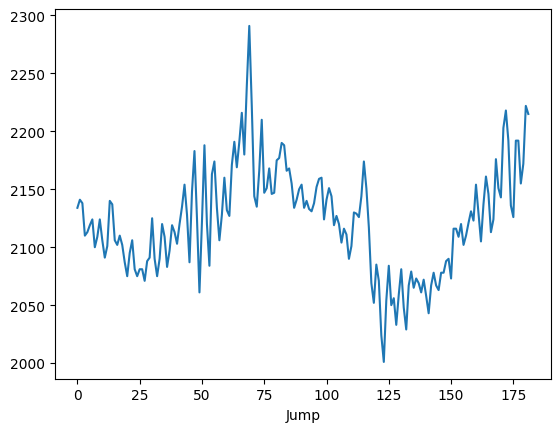

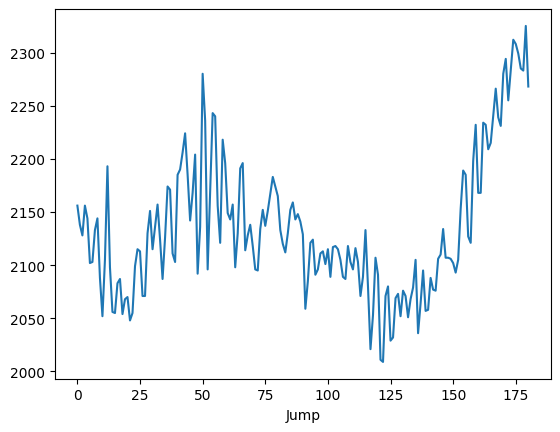

In [109]:
csv = pd.read_csv("data/training_data/Circle (1).csv")
PARx = csv.loc[:, '92W']
A = list(range(len(PARx)))  # 'W' 열의 데이터 개수에 맞게 범위 설정

plt.plot(A, PARx)
plt.xlabel("Jump")
plt.show()

csv = pd.read_csv("data/training_data/Circle (5).csv")
PARx = csv.loc[:, '92W']
A = list(range(len(PARx)))  # 'W' 열의 데이터 개수에 맞게 범위 설정

plt.plot(A, PARx)
plt.xlabel("Jump")
plt.show()


In [167]:
learning_rate = 0.001
training_epochs = 200
batch_size = 1

In [133]:
y = trainingset_df['label']
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [134]:
y = testset_df['label']
y.values

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 0, 0, 1, 1, 2, 2, 3,
       3, 4, 4])

In [151]:
torch.from_numpy(np.array(y[1])).long()

tensor(0)

In [152]:
def file_load(option):
    data_path_list = []
    for row in range(0, len(trainingset_df)):
        data_path_list.append(default_data_path + '/' + option + '/' + trainingset_df['filename'].iloc[row])
    return data_path_list

class CustomDataset(data.Dataset):
    def __init__(self, opt_data):
        super(CustomDataset, self).__init__()
        self.file_list = file_load(opt_data)
        y = trainingset_df['label']
        self.y = y.values

    def __getitem__(self, index):
        x = pd.read_csv(self.file_list[index])['92W'][:150].to_numpy()
        x_data = torch.from_numpy(x).float()

        max_val = torch.max(x_data)
        min_val = torch.min(x_data)

        normalized_x_data = (x_data - min_val) * 2 / (max_val - min_val) - 1

        y_data = torch.from_numpy(np.array(self.y[index])).long()
        return normalized_x_data, y_data

    def __len__(self):
        return len(self.y)

if __name__ == "__main__":
    a = CustomDataset('training_data')

In [153]:
'''
Main parameters for Dataloader
shuffle:
drop_last: if the last batch does not have enough number, throws it away
num_workers: how many CPU to use (default is 0)
collate_fn: function that creates batch
'''
train_dataset = CustomDataset('training_data')
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

train_dataset[4]


(tensor([ 0.0849, -0.0480, -0.1218,  0.0849, -0.0037, -0.3137, -0.3063, -0.0849,
         -0.0037, -0.4170, -0.6827, -0.2915,  0.3579, -0.3432, -0.6531, -0.6605,
         -0.4539, -0.4244, -0.6679, -0.5646, -0.5498, -0.7122, -0.6605, -0.3358,
         -0.2177, -0.2325, -0.5424, -0.5424, -0.1070,  0.0480, -0.2177, -0.0627,
          0.0923, -0.1513, -0.4244, -0.1365,  0.2177,  0.1956, -0.2472, -0.3063,
          0.2989,  0.3358,  0.4539,  0.5867,  0.2989, -0.0185,  0.1734,  0.4391,
         -0.3875, -0.0627,  1.0000,  0.6753, -0.3579,  0.1882,  0.7269,  0.7048,
          0.0849, -0.1734,  0.5424,  0.3801,  0.0332, -0.0111,  0.0923, -0.3432,
         -0.1070,  0.3432,  0.3801, -0.2251, -0.1218, -0.0480, -0.1956, -0.3579,
         -0.3653, -0.0775,  0.0554, -0.0554,  0.0480,  0.1661,  0.2841,  0.2177,
          0.1513, -0.0849, -0.1808, -0.2399, -0.1070,  0.0554,  0.1070, -0.0111,
          0.0258, -0.0258, -0.1144, -0.6310, -0.4391, -0.1734, -0.1513, -0.3948,
         -0.3579, -0.2472, -

In [154]:
train_dataset[360]

(tensor([-0.5280, -0.6188, -0.5976, -0.6581, -0.6672, -0.8033, -0.7489, -0.3495,
         -0.2012, -0.1467, -0.1286, -0.2436,  0.1044,  0.6520,  1.0000,  0.9546,
          0.7337,  0.6520,  0.7337,  0.9637,  0.9092,  0.3797,  0.1528,  0.1225,
          0.3101,  0.3343,  0.0499, -0.1256,  0.1044,  0.0136, -0.1165,  0.0681,
          0.1346, -0.3858, -0.5703, -0.1104,  0.3041,  0.0469, -0.2405, -0.2557,
         -0.0651,  0.1710, -0.1346, -0.4463, -0.2315, -0.0923, -0.2103,  0.1044,
          0.3646,  0.3101, -0.0651, -0.0227,  0.2133,  0.3071,  0.1861,  0.1921,
          0.1770,  0.4826,  0.4493,  0.2526,  0.1800,  0.1467,  0.2103,  0.3676,
          0.3101,  0.2466,  0.3101,  0.4887,  0.4644,  0.6248,  0.5008,  0.3828,
          0.3888,  0.3343,  0.4856,  0.4372,  0.1467,  0.0166,  0.1710,  0.0832,
         -0.1256, -0.3585, -0.6036, -0.5068, -0.3797, -0.5946, -0.8729, -0.7126,
         -0.6097, -0.6127, -0.6732, -0.5129, -0.4463, -0.3162, -0.4130, -0.5129,
         -0.3495, -0.3071, -

In [156]:

# test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# test_dataset[9]
# sample_data = test_dataset[9][0]
# print(sample_data.size())

In [157]:
train_input, train_label = next(iter(train_dataloader))
print(train_input.size())
print(train_label.size())
# test_input, test_label = next(iter(test_dataloader))
# print(test_input.size())
# print(test_label.size())

torch.Size([1, 150])
torch.Size([1])


In [158]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [163]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # conv1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5,
                               stride=3, padding=0, dilation=1,
                               groups=1, bias=True, padding_mode='zeros')
        
        # conv2
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=100, kernel_size=5,
                               stride=3, padding=0, dilation=1,
                               groups=1, bias=True, padding_mode='zeros')
        
        self.fc1 = nn.Linear(100 * 15, 256)
    
        self.fc2 = nn.Linear(256, 5)

    

    def forward(self, x):
        #print("연산 전", x.size())
        x = self.conv1(x)
        #print("cnn1 연산 후", x.size())
        x = self.conv2(x)
        #print("cnn2 연산 후", x.size())
        x = x.view(-1, 100 * 15)  # 배치 크기를 유지하면서 Flatten
        x = self.fc1(x)
        #print("fc1 연산 후", x.size())
        x = self.fc2(x)
        #print("fc2 연산 후", x.size())

        return x

# create model
model = Net().to(device)

print(model)

Net(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(3,))
  (conv2): Conv1d(64, 100, kernel_size=(5,), stride=(3,))
  (fc1): Linear(in_features=1500, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=5, bias=True)
)


In [164]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [165]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 365


In [168]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_dataloader: 
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 1.01758432
[Epoch:    2] cost = 0.949663162
[Epoch:    3] cost = 0.953956425
[Epoch:    4] cost = 0.93674767
[Epoch:    5] cost = 0.888226926
[Epoch:    6] cost = 0.915013015
[Epoch:    7] cost = 0.897301733
[Epoch:    8] cost = 0.861549139
[Epoch:    9] cost = 0.826961219
[Epoch:   10] cost = 0.786767721
[Epoch:   11] cost = 0.817219853
[Epoch:   12] cost = 0.807296455
[Epoch:   13] cost = 0.819029272
[Epoch:   14] cost = 0.804930806
[Epoch:   15] cost = 0.770513356
[Epoch:   16] cost = 0.760655165
[Epoch:   17] cost = 0.78455466
[Epoch:   18] cost = 0.739043176
[Epoch:   19] cost = 0.703103185
[Epoch:   20] cost = 0.641719401
[Epoch:   21] cost = 0.756274402
[Epoch:   22] cost = 0.759838998
[Epoch:   23] cost = 0.65428102
[Epoch:   24] cost = 0.66536808
[Epoch:   25] cost = 0.665847659
[Epoch:   26] cost = 0.697999716
[Epoch:   27] cost = 0.576833248
[Epoch:   28] cost = 0.677384496
[Epoch:   29] cost = 0.707460165
[Epoch:   30] cost = 0.661108851
[Epoch:   31] c

In [169]:
def file_load(option):
    data_path_list = []
    for row in range(0, len(testset_df)):
        data_path_list.append(default_data_path + '/' + option + '/' + testset_df['filename'].iloc[row])
    return data_path_list

class CustomDataset(data.Dataset):
    def __init__(self, opt_data):
        super(CustomDataset, self).__init__()
        self.file_list = file_load(opt_data)
        y = testset_df['label']
        self.y = y.values

    def __getitem__(self, index):
        x = pd.read_csv(self.file_list[index])['92W'][:150].to_numpy()
        x_data = torch.from_numpy(x).float()

        max_val = torch.max(x_data)
        min_val = torch.min(x_data)

        normalized_x_data = (x_data - min_val) * 2 / (max_val - min_val) - 1

        y_data = torch.from_numpy(np.array(self.y[index])).long()
        return normalized_x_data, y_data

    def __len__(self):
        return len(self.y)

if __name__ == "__main__":
    a = CustomDataset('training_data')


test_dataset = CustomDataset('test_data')

In [172]:
test_dataset[24]

(tensor([ 0.4204,  0.4469,  0.5000,  0.6814,  0.6637,  0.4867,  0.5442,  0.6239,
          0.6549,  0.3053,  0.1106,  0.4159,  0.4823,  0.2876,  0.2257,  0.4867,
          0.0929, -0.2566, -0.0575,  0.2212,  0.0177, -0.3142, -0.1903, -0.0796,
         -0.4204, -0.2035, -0.4027, -0.3850, -0.2522, -0.0221, -0.1327, -0.4956,
         -0.3363, -0.2522, -0.0973, -0.1018, -0.1150, -0.0973,  0.0133,  0.0531,
         -0.0487, -0.2212, -0.1504, -0.0133, -0.0885, -0.0575,  0.0044,  0.1681,
          0.0796,  0.0973,  0.0619,  0.0265, -0.0973,  0.0487,  0.0398,  0.0575,
         -0.0088, -0.0885, -0.0708,  0.0354, -0.0133, -0.3628, -0.0531, -0.1549,
          0.0531,  0.1150,  0.0000, -0.1195,  0.0133,  0.0575,  0.0088,  0.2743,
          0.2699,  0.2168,  0.1062,  0.0000,  0.0487,  0.1327,  0.1814,  0.1283,
          0.1858,  0.1018,  0.2035,  0.1991,  0.3097,  0.4469,  0.4336,  0.0531,
          0.0088,  0.5708,  0.7788,  0.3805,  0.1062,  0.3097,  0.6947,  0.7345,
          0.4779,  0.2035,  

In [177]:
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


val_loss = []
val_acc = []

for i, (images, targets) in enumerate(test_loader):
    model.eval()
    with torch.no_grad():
        outputs = model(images)
        valid_loss = criterion(outputs,targets).cpu().detach().numpy()

        preds = torch.argmax(outputs,axis = 1)
        preds = preds.cpu().detach().numpy()

        targets = targets.cpu().detach().numpy()
        batch_acc = (preds==targets).mean()



        val_loss.append(valid_loss)
        val_acc.append(batch_acc)

val_loss = np.mean(val_loss)
val_acc = np.mean(val_acc)

print(f'Epoch: {epoch} - valid Loss: {val_loss:.6f} - valid_acc : {val_acc:.6f}')

Epoch: 199 - valid Loss: 39.535751 - valid_acc : 0.120000


In [ ]:
with torch.no_grad():
    X_test = test_dataset.test_data.view(len(testset_df), 1, 150).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())